# Face recognition using Logistic regression

In [45]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [46]:
faces = fetch_lfw_people(min_faces_per_person=100)

In [47]:
faces.data.shape

(1140, 2914)

In [48]:
faces.target_names

array(['Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Tony Blair'], dtype='<U17')

In [49]:
np.unique(faces.target)

array([0, 1, 2, 3, 4])

In [50]:
np.bincount(faces.target)

array([236, 121, 530, 109, 144])

In [51]:
t = faces.data[500].reshape(62,47)

In [52]:
t.shape

(62, 47)

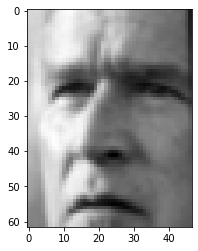

In [53]:
plt.imshow(t,cmap='gray')
plt.show()

In [54]:
x = faces.data
y = faces.target

## Plotting multiple images in pyplot

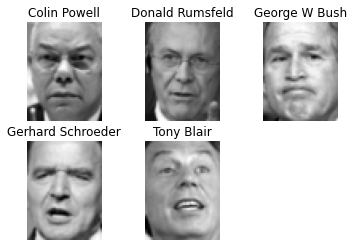

In [55]:
for i in range(5):
    plt.subplot(2,3,i+1)
    x_1=x[y==i][0]
    plt.imshow(x_1.reshape(62,47),cmap='gray')
    plt.title(faces.target_names[i])
    plt.axis('off')
plt.show()

In [56]:
x.shape

(1140, 2914)

## Selecting only 2 classes here

In [57]:
x1 = x[y==2][:109]
y1 = y[y==2][:109]
#     [y==column][:no of rows] 
x2 = x[y==4][:109]
y2 = y[y==4][:109]

In [58]:
x_data = np.concatenate((x1,x2))
y_data = np.concatenate((y1,y2))

In [59]:
x_data.shape

(218, 2914)

In [60]:
y_data.shape

(218,)

In [61]:
np.unique(y_data)

array([2, 4])

In [62]:
pd.Series(y_data).value_counts()

2    109
4    109
dtype: int64

## Now Splitting data

In [63]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [64]:
xtrain,xtest,ytrain,ytest = train_test_split(x_data,y_data,test_size=30,random_state=10,shuffle=True)

In [65]:
xtrain.shape

(188, 2914)

In [66]:
xtest.shape

(30, 2914)

### Normalize the data in train and test dataset (Feature Scaling)

In [67]:
xtrain.max()

255.0

In [68]:
xtest.max()

254.33333

In [69]:
xtrain_normalized = xtrain/xtrain.max()
xtest_normalized = xtest/xtest.max()

### Applying PCA on the dataset to reduce features

In [70]:
pca = PCA(n_components = .97)

In [71]:
pca_train = pca.fit_transform(xtrain_normalized)
pca_test = pca.transform(xtest_normalized)

In [72]:
pca_train.shape

(188, 100)

In [73]:
pca_test.shape

(30, 100)

### Now use Logistic regression to classify the image

In [74]:
log = LogisticRegression(solver = 'lbfgs')
log.fit(pca_train,ytrain)

LogisticRegression()

In [75]:
test_score = log.score(pca_test,ytest)
test_score

0.9666666666666667

In [76]:
train_score = log.score(pca_train,ytrain)
train_score

1.0

## Now testing model on imported image

In [95]:
image = cv2.imread('/home/Machine_learning/github/Machine_Learning/Prutor_ML_ClassWork/face_recognoition/gw_2.jpg')

In [96]:
image.shape

(1819, 1455, 3)

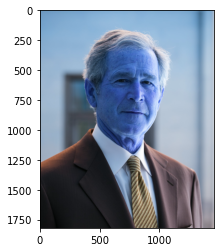

In [97]:
plt.imshow(image)

In [98]:
model = cv2.CascadeClassifier('xml_open_cv_trained_model/frontal_face.xml')

In [99]:
face1 = model.detectMultiScale(image,1.3,5)

In [100]:
face1

array([[518, 387, 546, 546]], dtype=int32)

### Getting the width and height of the face along with it's x and y coordinates in the image

In [101]:
x,y,w,h = face1[0]

#### Getting the face by cropping up the image

In [102]:
face = image[y:y+h,x:x+w]
face.shape

(546, 546, 3)

In [103]:
cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
cv2.imshow('face',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [104]:
image.shape

(1819, 1455, 3)

### Now Remeber whatever operations we do will be the same but all the operations will be done on the face not the entire image

#### Resizing image

In [105]:
resized = cv2.resize(face,(47,62))

In [112]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

In [113]:
resized.shape

(62, 47, 3)

In [115]:
gray.shape

(62, 47)

In [116]:
gray_image = cv2.resize(gray,(47,62))

In [117]:
gray_image.shape

(62, 47)

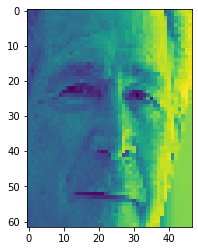

In [118]:
plt.imshow(gray_image)

#### Reshaping image

In [119]:
t1 = gray_image.reshape(1,-1)
t1.shape

(1, 2914)

#### Feature scaling the image

In [120]:
t2 = t1/t1.max()

In [121]:
t2.shape

(1, 2914)

In [122]:
t3 = pca.transform(t2)

### Predicting the face from the image now 

In [125]:
#getting the index number of the predicted class
pred = log.predict(t3)
index = pred[0]
index 

2

In [126]:
#from the index number getting the name of the person in the image after detection
faces.target_names[index]

'George W Bush'

In [ ]:
## Try the same program on all classes
## Try the same program using SVM